In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

plt.style.use('ggplot') # styling graph

# Introduction

**This work is intentionally built for personal use, that is to exercise in data analysis and visualization.**

Greetings and a warm welcome to my notebook. Within this dataset, I set out to explore and find answers to the following intriguing questions:

- How many Uber trips occurred during the timestamp in the dataset?
- What is the median for daily and monthly total trips?
- How is the customer segment proportion?
- How is the hourly trend for Uber trips?
- How are the conditional probabilities of each segment ordering an Uber for each hour?
- What are the favorite pick-up spots for each segment?
- How is the daily trend for Uber trips?
- How is the monthly trend for Uber trips?
- Is there any specific characteristic of each segment based on their travel distance?
- Is there any specific characteristic of each segment based on the travel duration?

Your guidance and feedback are invaluable, and I look forward to learning and growing through your contributions. Thank you all, and here's to an enjoyable and enlightening read!

# Data description

- `START_DATE`: Timestamp that marks the start of the trip.
- `END_DATE`: Timestamp that marks the end of the trip.
- `CATEGORY`: Uber customer category.
- `START`: Location that marks the start of the trip.
- `STOP`: Location that marks the start of the trip.
- `MILES`: Travel distance.
- `PURPOSE`: Customer's purpose of ordering Uber.

# Importing data

In [2]:
# Defining dataframe
df = pd.read_csv("UberDataset.csv")

# Oversee the data
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


Apparently, we have an unnecessary record in the index 1155. Thus we are going to drop them.

In [3]:
# Droping record with index 1155
df.drop(index=1155, axis=0, inplace=True)

In [4]:
# Checking data
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
# Checking datatypes
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

- We have the `START_DATE` and the `END_DATE` column in our data that consists of the date and timestamp of each Uber trip.
- These columns are still having `object` datatypes.
- To ease our analysis, we are going to change their data types from object to datetime.

## Converting necessary column to datetime object

In [6]:
# Converting START_DATE datatypes
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m/%d/%Y %H:%M', errors='coerce', utc=True)

# Converting END_DATE datatypes
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce', utc=True)


In [7]:
# Checking changes
df.dtypes

START_DATE    datetime64[ns, UTC]
END_DATE      datetime64[ns, UTC]
CATEGORY                   object
START                      object
STOP                       object
MILES                     float64
PURPOSE                    object
dtype: object

- Okay so now all columns have their data types the way we desired.
- However, we are going to rename columns `START` and `STOP` to `START_POINT` and `STOP_POINT` respectively so that it can be more self-explaining.

## Renaming columns

In [8]:
# Renaming columns
df.rename(columns={'START': 'START_POINT', 'STOP': 'STOP_POINT'}, inplace=True)

In [9]:
# Checking dataframe
df

,START_DATE,END_DATE,CATEGORY,START_POINT,STOP_POINT,MILES,PURPOSE
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00+00:00,2016-12-31 01:14:00+00:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00+00:00,2016-12-31 13:42:00+00:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00+00:00,2016-12-31 15:38:00+00:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00+00:00,2016-12-31 21:50:00+00:00,Business,Katunayake,Gampaha,6.4,Temporary Site


# Cleaning the data

## Checking duplicated values

Creating function to check and remove duplicates.

In [10]:
# Creating function to check and remove duplicates
def duplicateVal(df):
    # Checking shape before dropping duplicates
    before_drop = df.shape
    print(f'shape before dropping duplicate: {before_drop}')

    # Calculating total duplicated data
    total_duplicate = df.duplicated().sum()
    print(f'Total duplicated records: {total_duplicate}')

    # Dropping duplicated data
    df = df.drop_duplicates()

    # Checking shape after dropping duplicates
    after_drop = df.shape
    print(f'shape before dropping duplicate: {after_drop}')
    
    # Returning dataframe after droping duplicate
    return df

In [11]:
df = duplicateVal(df)

shape before dropping duplicate: (1155, 7)
Total duplicated records: 43
shape before dropping duplicate: (1112, 7)


Okay we have dropped the duplicated values

## Checking missing values

In [12]:
# Creating function to check null values
def missVal(data):
    # Calculating total missing values in each column
    total = data.isna().sum().sort_values(ascending=False)
    
    # Calculating missing value percentage in each column
    percent = total/len(data)
    
    # Returning result
    return pd.concat([total, percent], keys=['Total', 'Missing Persentage'], axis=1)

In [13]:
# Checking null values
missVal(df)

,Total,Missing Persentage
PURPOSE,499,0.448741
START_DATE,379,0.340827
END_DATE,378,0.339928
CATEGORY,0,0.000000
START_POINT,0,0.000000
STOP_POINT,0,0.000000
MILES,0,0.000000


- Okay so we only have 1 column that has missing values and that is the `PURPOSE` column which has a total of 502 missing values or there are ~43% data missing.
- Let's zoom in on the `PURPOSE` column.

In [14]:
# Checking unique values in column PURPOSE
df['PURPOSE'].value_counts()

Meeting            164
Meal/Entertain     152
Errand/Supplies    125
Customer Visit      96
Temporary Site      49
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

- It looks like the `PURPOSE` column is just the detail or the note associated with the `CATEGORY` column.

In [15]:
# Checking PURPOSE and CATEGORY columns unique values individually
to_check = ['CATEGORY', 'PURPOSE']
for col in to_check:
    print(df[col].value_counts())
    print('')

Business    1035
Personal      77
Name: CATEGORY, dtype: int64

Meeting            164
Meal/Entertain     152
Errand/Supplies    125
Customer Visit      96
Temporary Site      49
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64



In [16]:
# Checking PURPOSE and CATEGORY columns combined unique values
df[['CATEGORY', 'PURPOSE']].value_counts().sort_index(level=0, ascending=True)

CATEGORY  PURPOSE        
Business  Airport/Travel       3
          Between Offices     18
          Customer Visit      96
          Errand/Supplies    125
          Meal/Entertain     152
          Meeting            164
          Temporary Site      49
Personal  Charity ($)          1
          Commute              1
          Moving               4
dtype: int64

- Actually, we can fill in the missing values in the `PURPOSE` column later by looking at some pattern in each `PURPOSE` category.
- Or, other best practices suggest that missing values can be filled with 'UNKNOWN' value.
- We also get additional information that `PURPOSE` column has rare values like `Charity`, `Commute`, `Moving`, `Airport/Travel`, and `Between Offices`
- In the context of preparing data for machine learning, we have to do something with these rare values, as it can cause troubles and worsen the model performance in the future.
- However, as my purpose for this session is to analyze and visualize the data, I will not take action on the missing values and the rare values.

## Checking inconsistent data input (Categorical data)

In [17]:
# Checking data types
df.dtypes

START_DATE     datetime64[ns, UTC]
END_DATE       datetime64[ns, UTC]
CATEGORY                    object
START_POINT                 object
STOP_POINT                  object
MILES                      float64
PURPOSE                     object
dtype: object

In [18]:
# Checking categorical/str data unique values
for col in df.columns:
    if df[col].dtypes == object:
        print(df[col].value_counts())
        print('')

Business    1035
Personal      77
Name: CATEGORY, dtype: int64

Cary                181
Unknown Location    148
Morrisville          78
Whitebridge          66
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START_POINT, Length: 177, dtype: int64

Cary                 183
Unknown Location     149
Morrisville           76
Whitebridge           62
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP_POINT, Length: 188, dtype: int64

Meeting            164
Meal/Entertain     152
Errand/Supplies    125
Customer Visit      96
Temporary Site      49
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64



- As we can see from the previous code and the code above, the `CATEGORY` and the `PURPOSE` columns already have consistent data input.
- However, we have to see the details of how the data in the `START_POINT` and `STOP_POINT` columns are inputted.

In [19]:
for i in df['START_POINT'].value_counts().sort_index().index:
    print(i)

Agnew
Almond
Apex
Arabi
Arlington
Arlington Park at Amberly
Asheville
Austin
Banner Elk
Bellevue
Berkeley
Boone
Briar Meadow
Bryson City
Burtrose
CBD
Capitol One
Cary
Central
Chalmette
Chapel Hill
Chessington
College Avenue
Colombo
Columbia Heights
Congress Ave District
Connecticut Avenue
Convention Center District
Cory
Couples Glen
Covington
Coxville
Daytona Beach
Downtown
Durham
Eagan Park
Eagle Rock
East Austin
East Elmhurst
East Harlem
Eastgate
Edgehill Farms
El Cerrito
Elk Park
Elmhurst
Emeryville
Fairmont
Farmington Woods
Fayetteville Street
Financial District
Flatiron District
Florence
Fort Pierce
Fuquay-Varina
Galveston
Gampaha
Georgian Acres
Gulfton
Hayesville
Hazelwood
Hell's Kitchen
Heritage Pines
Holly Springs
Houston
Hudson Square
Huntington Woods
Ingleside
Islamabad
Jackson Heights
Jacksonville
Jamaica
Jamestown Court
K Street
Kalorama Triangle
Kar?chi
Karachi
Katunayaka
Katunayake
Katy
Kenner
Kilarney Woods
Kissimmee
Krendle Woods
Lahore
Lake Reams
Lake Wellingborough
La

In the **START_POINT** column, the values below are inconsistent. They are supposed to be one value because they refer to the same location.

- Kar?chi and Karachi are supposed to be **Karachi** (a city in Pakistan)
- Katunayaka and Katunayake supposed to be **Katunayake** (International airport in Sri Lanka)
- Pontchartrain Beach and Pontchartrain Shores refer to a highly close location and therefore can be merged into one value, and that is **Pontchartrain Beach** (an amusement park in the U.S.)
- R?walpindi and **Rawalpindi** are supposed to be Rawalpindi (a city in Pakistan)

In [20]:
# Let's see how much of this inconsistent data
incons_data = ['Kar?chi', 'Katunayaka', 'Pontchartrain Shores', 'R?walpindi']
df.loc[df['START_POINT'].isin(incons_data), 'START_POINT'].value_counts()

Kar?chi                 27
R?walpindi              11
Katunayaka               2
Pontchartrain Shores     2
Name: START_POINT, dtype: int64

In [21]:
# Consistening values in the START_POINT column
df['START_POINT'].replace({
    'Kar?chi': 'Karachi',
    'Katunayaka': 'Katunayake',
    'Pontchartrain Shores': 'Pontchartrain Beach',
    'R?walpindi': 'Rawalpindi'
}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12952\509483552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_POINT'].replace({


In [22]:
# Checking data
df['START_POINT'].isin(incons_data).sum()

0

In [23]:
# Now let's see the data in the STOP_POINT column
for i in df['STOP_POINT'].value_counts().sort_index().index:
    print(i)

Agnew
Alief
Almond
Apex
Arabi
Arlington
Arlington Park at Amberly
Arts District
Asheville
Banner Elk
Bay Farm Island
Bellevue
Berkeley
Boone
Briar Meadow
Bryson City
Burtrose
Bywater
CBD
Capitol One
Cary
Cedar Hill
Central
Chalmette
Chapel Hill
Chessington
College Avenue
Colombo
Columbia Heights
Congress Ave District
Convention Center District
Cory
Covington
Coxville
Daytona Beach
Depot Historic District
Downtown
Durham
Eagle Rock
East Elmhurst
East Harlem
Edgehill Farms
El Cerrito
Elk Park
Emeryville
Farmington Woods
Faubourg Marigny
Financial District
Florence
Fort Pierce
French Quarter
Fuquay-Varina
Galveston
Gampaha
Gramercy-Flatiron
Greater Greenspoint
Gulfton
Harden Place
Hayesville
Hazelwood
Hell's Kitchen
Heritage Pines
Hog Island
Holly Springs
Houston
Hudson Square
Huntington Woods
Ilukwatta
Ingleside
Islamabad
Isles of Buena Vista
Jackson Heights
Jacksonville
Jamaica
Jamestown Court
K Street
Kalorama Triangle
Kar?chi
Karachi
Katunayaka
Katy
Kenner
Kilarney Woods
Kildaire Farm

In the **STOP_POINT** column, the values below are inconsistent. They are supposed to be one value because they refer to the same location.

- Kar?chi and Karachi are supposed to be **Karachi** (a city in Pakistan)
- Katunayaka is supposed to be **Katunayake** (International airport in Sri Lanka)
- Pontchartrain Beach and Pontchartrain Shores refer to a highly close location and therefore can be merged into one value, and that is **Pontchartrain Beach** (an amusement park in the U.S.)
- R?walpindi and **Rawalpindi** are supposed to be Rawalpindi (a city in Pakistan)

In [24]:
# Let's see how much of this inconsistent data
incons_data = ['Kar?chi', 'Katunayaka', 'Pontchartrain Shores', 'R?walpindi']
df.loc[df['STOP_POINT'].isin(incons_data), 'STOP_POINT'].value_counts()

Kar?chi                 26
R?walpindi              13
Katunayaka               2
Pontchartrain Shores     2
Name: STOP_POINT, dtype: int64

In [25]:
# Consistening values in the STOP_POINT column
df['STOP_POINT'].replace({
    'Kar?chi': 'Karachi',
    'Katunayaka': 'Katunayake',
    'Pontchartrain Shores': 'Pontchartrain Beach',
    'R?walpindi': 'Rawalpindi'
}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12952\1298918841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STOP_POINT'].replace({


In [26]:
# Checking data
df['STOP_POINT'].isin(incons_data).sum()

0

- Okay, so now all our categorical data are consistent we can examine our numerical data.

## Checking outliers and anomaly (Numerical data)


In [27]:
# Checking data types
df.dtypes

START_DATE     datetime64[ns, UTC]
END_DATE       datetime64[ns, UTC]
CATEGORY                    object
START_POINT                 object
STOP_POINT                  object
MILES                      float64
PURPOSE                     object
dtype: object

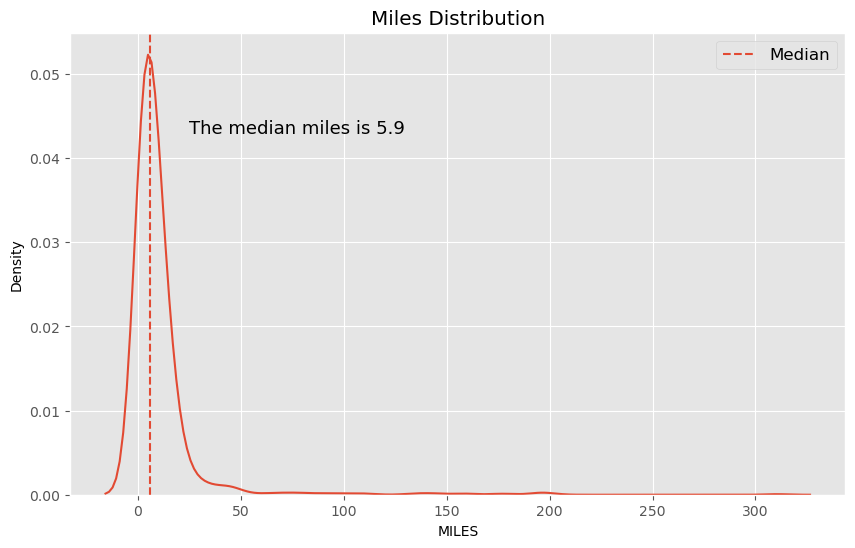

In [28]:
# Checking distributions in the MILES column

# Calculating MILES median
miles_median = df['MILES'].median()

# Creating figure an
fig, ax = plt.subplots(figsize = (10,6))

# Plotting 
sns.kdeplot(
    data = df,
    x = 'MILES',
    ax = ax
)

# Setting title
ax.set_title('Miles Distribution')

# Setting average line
ax.axvline(miles_median, linestyle='--', label = 'Median')
ax.annotate(f'The median miles is {miles_median}', 
            xy = (25,0.043),
            fontsize = 13
           )

# Showing legend
ax.legend(fontsize='large')

# Showing plot
plt.show()

- Here, we can see that the **trip median for this dataset is 6 miles**.
- However, **the distribution is right-skewed**, indicating that our trip dataset has outliers in terms of trip distance.
- Let's see the descriptive statistic for the `MILES` column.

In [29]:
# Seeing descriptive statistic for MILES column
df['MILES'].describe()

count    1112.000000
mean       10.712050
std        21.968587
min         0.500000
25%         2.800000
50%         5.900000
75%        10.600000
max       310.300000
Name: MILES, dtype: float64

We can see that

- The minimum trip distance in our dataset is 0.5 Miles
- The furthest trip is 310.3 Miles
- The 25th quantile is in 2.9 Miles
- The 75th quantile is in 10.4 Miles

For the purpose of analysis, I'm not going to remove the outliers for now.

# EDA
- How many Uber trips occurred during the timestamp in the dataset?
- What is the median for daily and monthly total trips?
- How is the customer segment proportion?
- How is the hourly trend for Uber trips?
- How are the conditional probabilities of each segment ordering an Uber for each hour?
- What are the favorite pick-up spots for each segment?
- How is the daily trend for Uber trips?
- How is the monthly trend for Uber trips?
- Is there any specific characteristic of each segment based on their travel distance?
- Is there any specific characteristic of each segment based on the travel duration?

# How many Uber trips occurred during the timestamp in the dataset?

In [30]:
# Extracting dataset timestamp
record_begin = df['START_DATE'].min()
record_end = df['START_DATE'].max()
print(f'The record start from: {record_begin}')
print(f'The record end in: {record_end}')

The record start from: 2016-01-13 13:54:00+00:00
The record end in: 2016-12-31 22:08:00+00:00


In [31]:
# Extracting how much trip recorded in the dataset
print(f'Total trips recorded: {len(df)} trips')

Total trips recorded: 1112 trips


### Insights

- The data records 1154 trips
- The data start to record trips from 1 Jan 2016 to 31 Dec 2016 (1-year timestamp)

# What is the median for daily and monthly total trips?

In [32]:
# Copying dataframe
median_trip_data = df.copy()

# Extracting Hour, Month, and Date information
median_trip_data['HOUR'] = median_trip_data['START_DATE'].apply(lambda x: x.strftime('%H'))
median_trip_data['MONTH'] = median_trip_data['START_DATE'].apply(lambda x: x.strftime('%b'))
median_trip_data['DATE'] = median_trip_data['START_DATE'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Checking the data
median_trip_data.head(2)

,START_DATE,END_DATE,CATEGORY,START_POINT,STOP_POINT,MILES,PURPOSE,HOUR,MONTH,DATE
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0,NaN,NaN,NaN,NaN


In [33]:
# Calculating median of total orders per month
median_trip_per_month = median_trip_data.groupby(['MONTH']).size().median()

# Calculating median of total orders per day
median_trip_per_day = median_trip_data.groupby(['DATE']).size().median()

print(f'Median of total orders per month: {median_trip_per_month} orders')
print(f'Median of total orders per day: {median_trip_per_day} orders')

Median of total orders per month: 68.0 orders
Median of total orders per day: 3.0 orders


### Insights
In 2016, there were approximately

- 110 orders each month (based on median measurement)
- 4 orders each day (based on median measurement)
- or we can say that there is 1 order for every 6-hour

# How is the customer segment proportion?

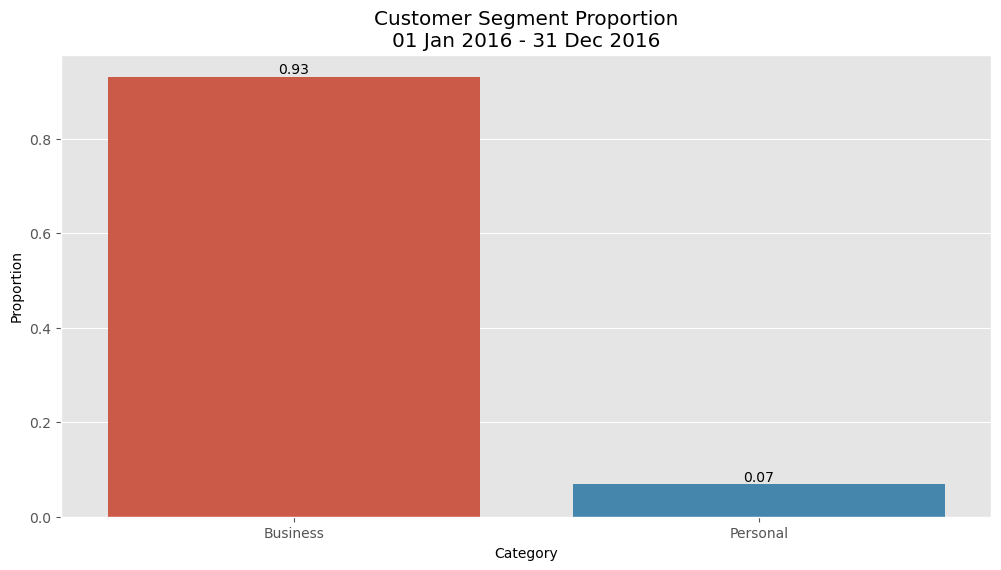

In [34]:
# Calculating CATEGORY column proportion
category_proportions = df['CATEGORY'].value_counts(normalize=True)

# Creating figure and axes object
fig, ax = plt.subplots(figsize = (12,6))

# Plotting
sns.barplot(x = category_proportions.index, 
            y = category_proportions.values,
            ax = ax
           )

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Customer Segment Proportion\n01 Jan 2016 - 31 Dec 2016')

# Add proportion numbers at the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

As we can see from the previous insights, the customer segments are divided into more detailed segmentation with the help of the `PURPOSE` column. So let's see its distribution.

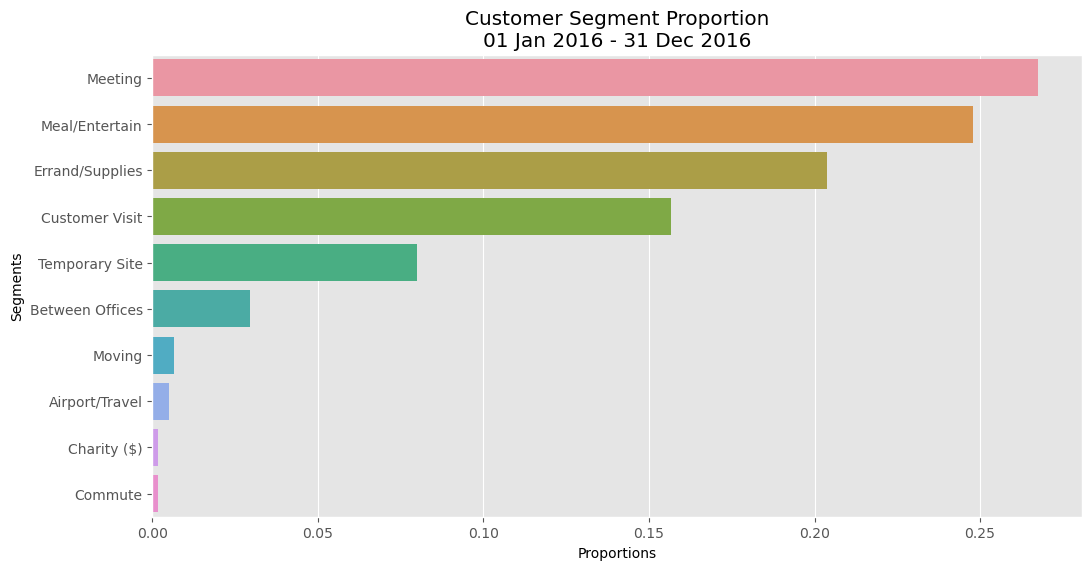

In [35]:
# Calculating PURPOSE column proportion
purpose_proportion = df['PURPOSE'].value_counts(normalize=True)

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting
sns.barplot(
    x = purpose_proportion.values,
    y = purpose_proportion.index,
    ax = ax
)

# Customizing
plt.title('Customer Segment Proportion\n01 Jan 2016 - 31 Dec 2016')
plt.xlabel('Proportions')
plt.ylabel('Segments')

plt.show()

### Insights

- Throughout 2016, **~93% of the customers used Uber for Business occasions**, compared to **only ~7% who used it for Personal use**.
- The top 3 purpose for our customers to order Uber is Meeting, Meal/Entertain, and Errand/Supplies, all of which lies in the category of Business.
- If from the very first start, the company does prioritize targeting business people, this result wouldn't be so much of a concern. However, if the company also indeed target Personal use customer, this result is concerning and thus needs to be investigated more.

# How is the hourly trend for Uber trips?

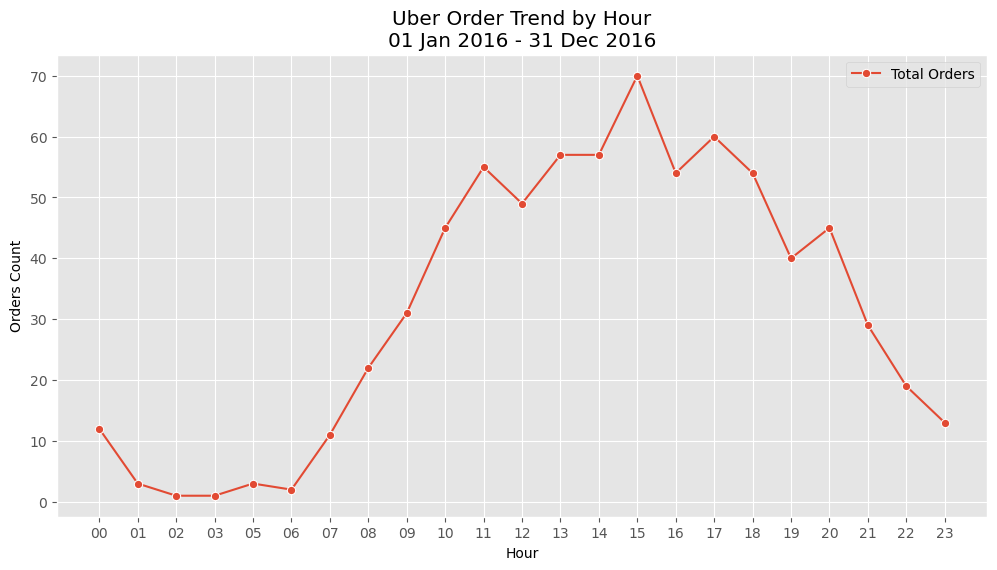

In [36]:
# Copy dataset
hourly_data = df.copy()

# Crete hour column
hourly_data['HOUR'] = hourly_data['START_DATE'].apply(lambda x: x.strftime('%H'))

# Counting data in each column
hourly_data_count = hourly_data.groupby(['HOUR']).size().reset_index(name='COUNT')

# Plotting trend

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Ploting
sns.lineplot(
    data = hourly_data_count,
    x = 'HOUR',
    y = 'COUNT',
    ax = ax,
    label = 'Total Orders',
    marker = '.',
    markersize = 12
)

# Customizing
ax.set_title('Uber Order Trend by Hour\n01 Jan 2016 - 31 Dec 2016')
ax.set_ylabel('Orders Count')
ax.set_xlabel('Hour')

plt.show()

### Insights
- The orders start to increase at 6 a.m.
- There are a relatively high amount of orders starting from 1 pm to 6 pm.
- Apparently, there was no Uber order made at the time interval 4 a.m. - 5 a.m. in 2016.

# How are the conditional probabilities of each segment ordering an Uber for each hour?

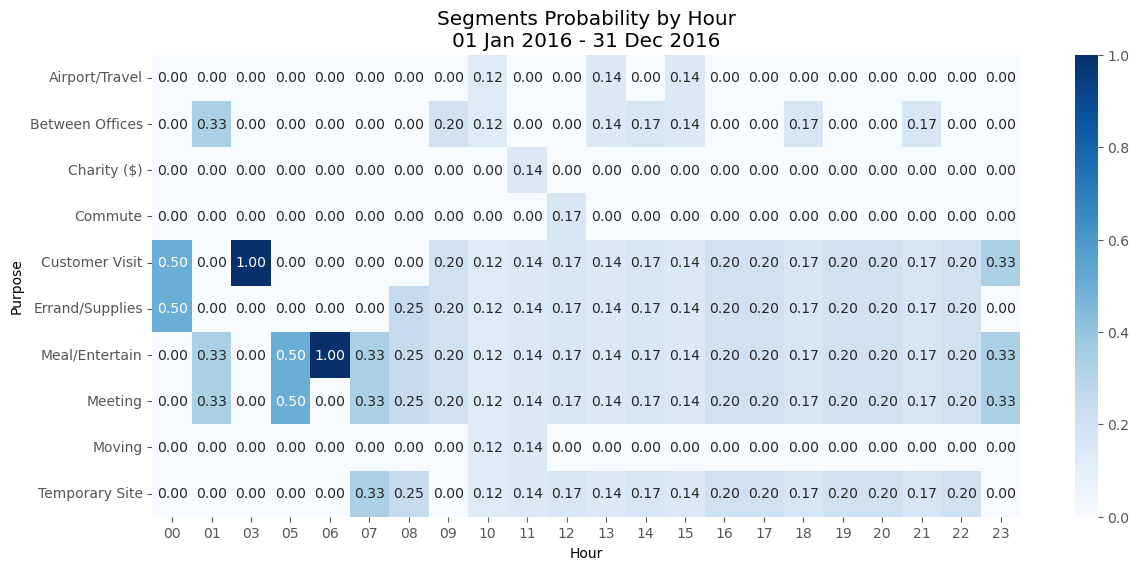

In [37]:
# Copying df
hourly_segment_proba = df.copy()

# Crete hour column
hourly_segment_proba['HOUR'] = hourly_segment_proba['START_DATE'].apply(lambda x: x.strftime('%H'))

# Groupby hour and purpose
hourly_segment_proba = hourly_segment_proba.groupby(['HOUR', 'PURPOSE']).size().div(len(df)).reset_index(name='PROBABILITY')

# Compute the contingency table
contingency_table = pd.crosstab(hourly_segment_proba['PURPOSE'], hourly_segment_proba['HOUR'], normalize='columns')

# Creating figure
plt.figure(figsize=(14, 6))

# Plotting
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='.2f')

# Customizing
plt.xlabel('Hour')
plt.ylabel('Purpose')
plt.title('Segments Probability by Hour\n01 Jan 2016 - 31 Dec 2016')

plt.show()

### Insights

By knowing the probability of someone ordering an Uber at a certain time, we can gain information about what kind of customers that most likely to order an Uber at that time. This information would be useful for the Uber company or the drivers as they can supply and prepare the resources needed to accommodate the customer's purposes.

- At 3 a.m., the possibility of a person ordering an Uber is for a Meeting, a Customer Visit, or Errand/Supplies.
- At 5 a.m., the possibility for someone ordering an Uber is either for a Meeting or for a Meal/Entertain.

So maybe at around 5 am-6 am, drivers could stand by in the office area or residential area so that they can pick up customers who are most likely in that time would have a Meeting or a Meal/Entertain purposes. To be more precise and connect more information, we can see the top pickup point preferences for each segment (purpose) based on the `START_POINT` column.

# What are the favorite pick-up spots for each segment?

In [38]:
# Extracting axes size
len(df['PURPOSE'].value_counts())

10

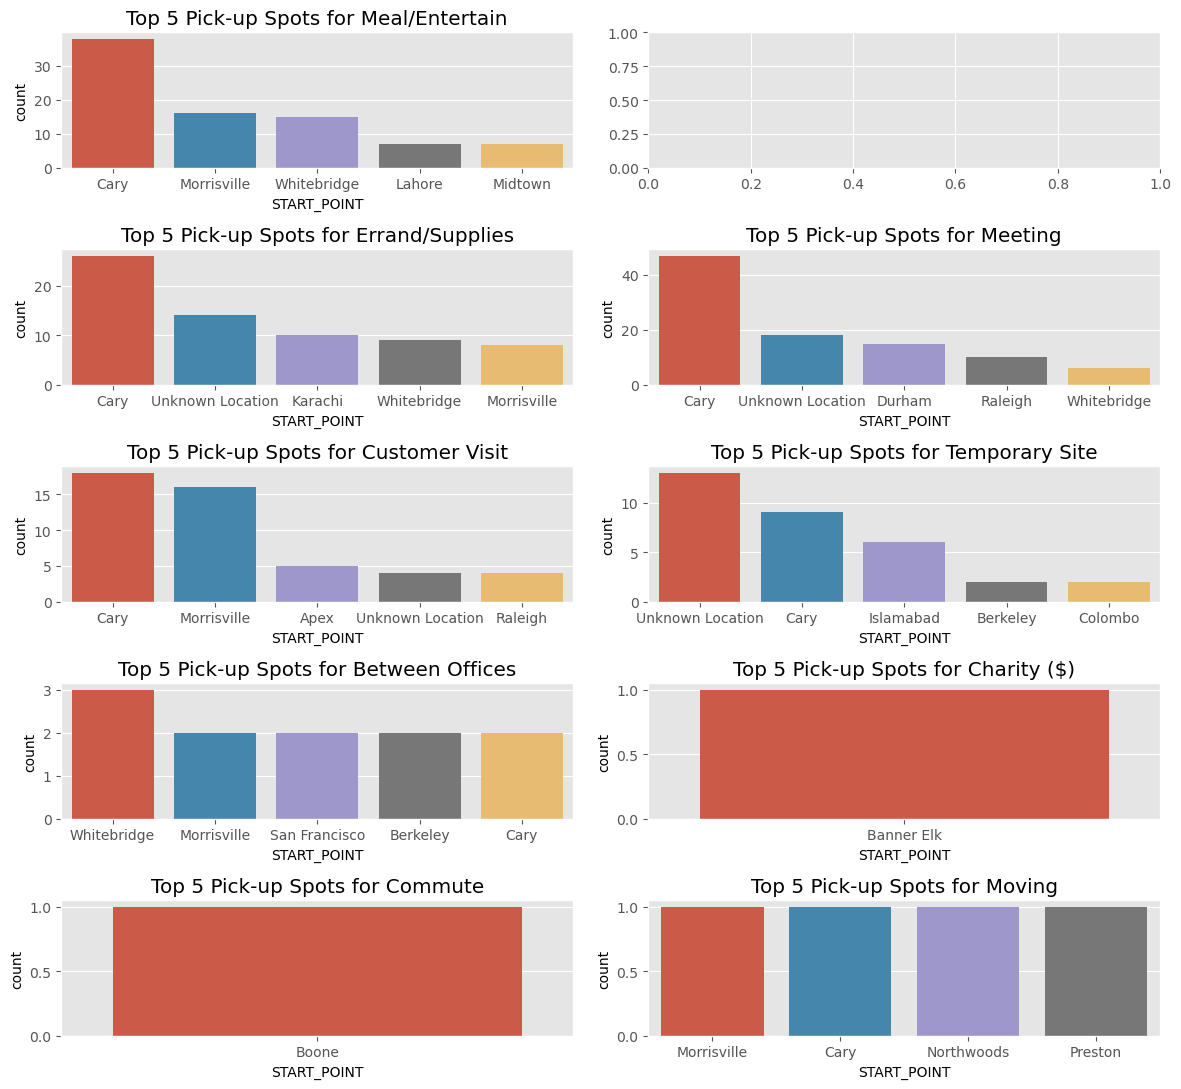

In [39]:
# Creating figure and axes object
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (12,11))

# Flatten the axs array
axs = axs.flatten()

# Extracting PURPOSE column categories
cat = df['PURPOSE'].unique()

# Zipping ax and categories
pair = tuple(zip(axs, cat))

# Plotting
for ax, cat in pair:
    if type(cat) == float:
        continue
    else:
        data = df.groupby(['PURPOSE', 'START_POINT']).size().reset_index(name='count').sort_values(by='count', ascending = False)
        sns.barplot(
            data = data.loc[data['PURPOSE'] == cat].head(5),
            x = 'START_POINT',
            y = 'count',
            ax = ax
        )
        ax.set_title(f'Top 5 Pick-up Spots for {cat}')
    
plt.tight_layout()
plt.show()

### Insights

Now we can correlate this information with our previous insight. For example

- At 5 a.m., drivers can stand by at Carry, Durham, Morrisville, or Whitebridge because the possibility of getting an order is great at that time and place. (Remember our insights on the previous question which states that, at 5 a.m. the order possibilities only come from customers who have a Meeting purpose or Meal/Entrtain purpose.
- This information also helps Uber and its drivers understand the customer's behaviors, specifically their location-ordering behavior.

# How is the daily trend for Uber trips?

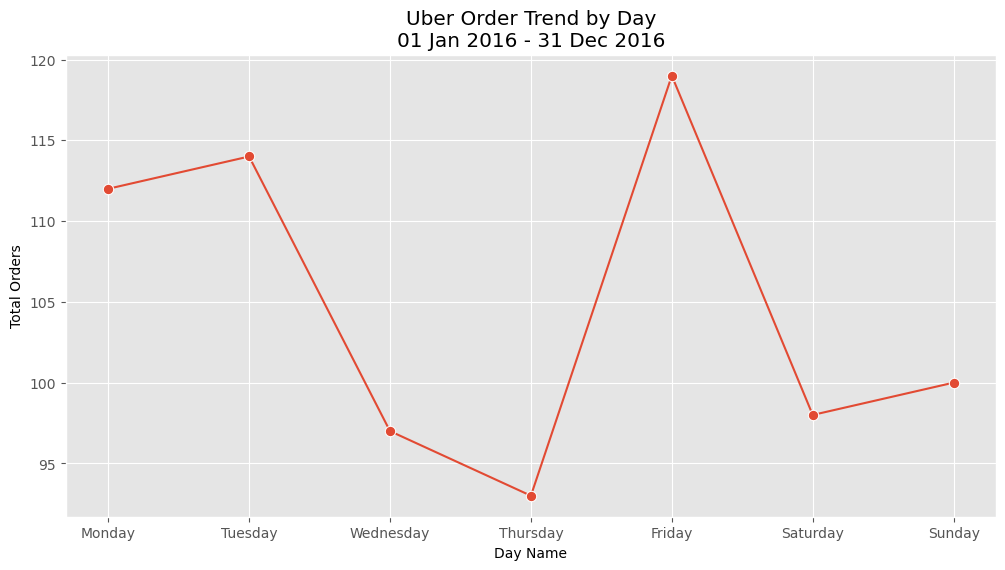

In [40]:
# Copying dataframe
daily_trend = df.copy()

# Creating column dayname
daily_trend['DAYNAME'] = daily_trend['START_DATE'].apply(lambda x: x.strftime('%A'))

# Counting orders per dayname
daily_trend = daily_trend.groupby(['DAYNAME']).size()

# Creating day name order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting
sns.lineplot(
    x = daily_trend.loc[day_order].index,
    y = daily_trend.loc[day_order].values,
    ax = ax,
    marker = '.',
    markersize = 15
)

# Customizing
ax.set_title('Uber Order Trend by Day\n01 Jan 2016 - 31 Dec 2016')
ax.set_xlabel('Day Name')
ax.set_ylabel('Total Orders')

plt.show()

### Insights
- Surprisingly, orders are less likely to occur on Wednesdays than on weekend days.
- Orders are skyrocketing on Friday.
- Low orders on the weekend can be associated with the customer segment proportion which implies ~93% of customers are ordering Uber for business purposes.

# How is the monthly trend for Uber trips?

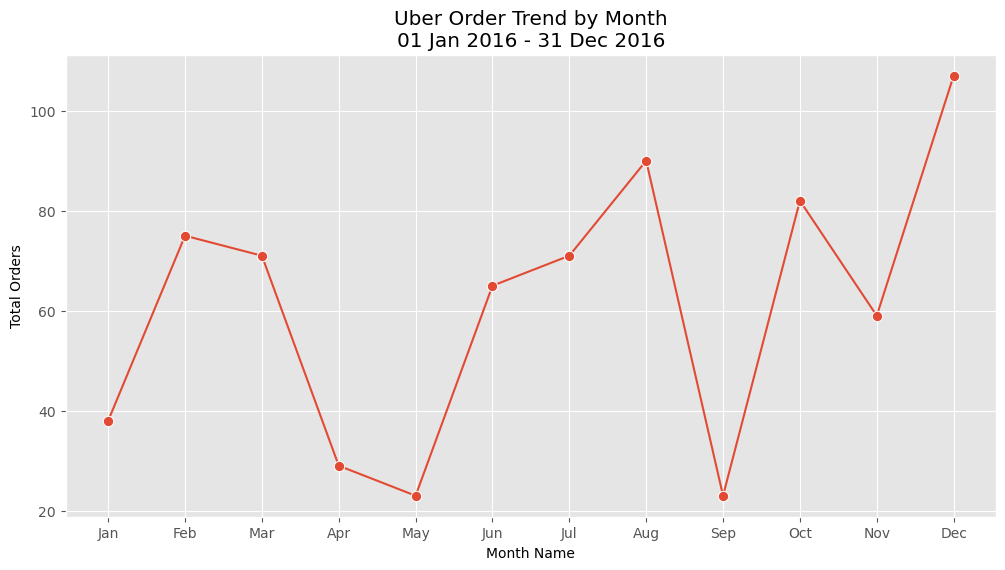

In [41]:
# Copying dataframe
monthly_trend = df.copy()

# Creating column month
monthly_trend['MONTH'] = monthly_trend['START_DATE'].apply(lambda x: x.strftime('%b'))

# Counting orders per month
monthly_trend = monthly_trend.groupby(['MONTH']).size()

# Creating month name order
month_order = [
    'Jan', 
    'Feb', 
    'Mar', 
    'Apr', 
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
]

# Creating figure and axes object
fig, ax = plt.subplots(figsize=(12,6))

# Plotting
sns.lineplot(
    x = monthly_trend.loc[month_order].index,
    y = monthly_trend.loc[month_order].values,
    ax = ax,
    marker = '.',
    markersize = 15
)

ax.set_title('Uber Order Trend by Month\n01 Jan 2016 - 31 Dec 2016')
ax.set_xlabel('Month Name')
ax.set_ylabel('Total Orders')

plt.show()

### Insights
- The orders are increasing and considered in the relatively high amount in Q1.
- The orders are declining at the beginning of Q2 but increase at the end of the quarter.
- In Q3, it increased at the beginning of the quarter, however, it declined steeply at the end of the quarter.
- And the order experienced a good increasing trend in the last quarter (Q4).

# Is there any specific characteristic of each segment based on their travel distance?

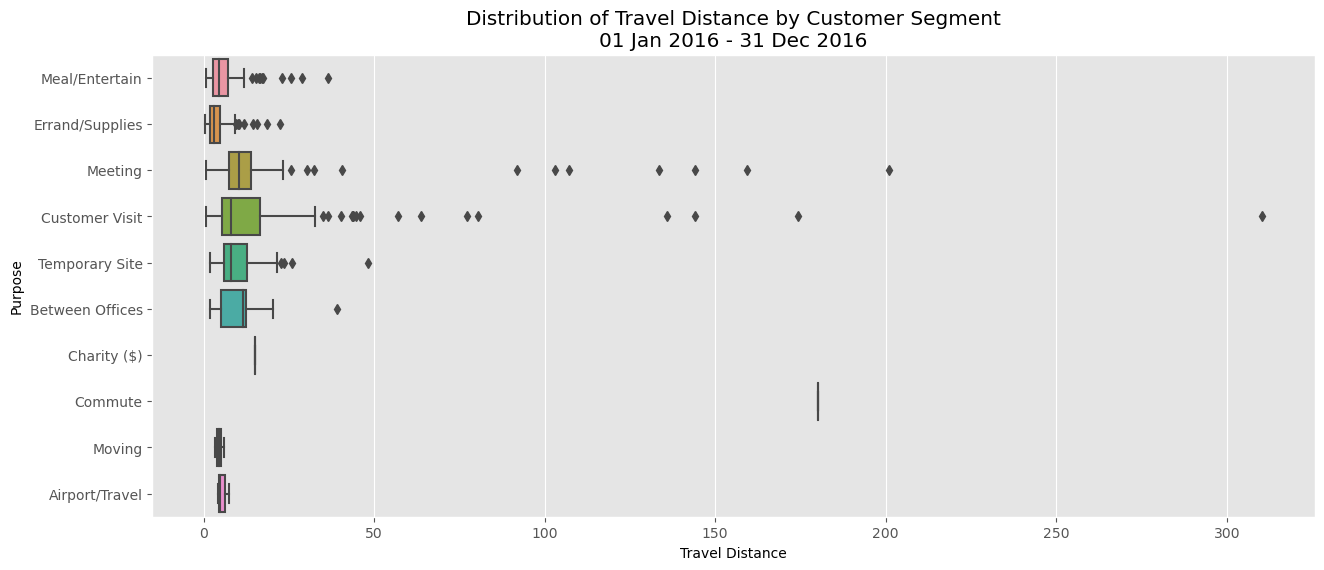

In [42]:
# Copying dataframe
avg_distance = df.copy()

# Creating figure and axes object
plt.figure(figsize=(15, 6))

# Plotting
sns.boxplot(data=avg_distance, x='MILES', y='PURPOSE')
plt.xlabel('Travel Distance')
plt.ylabel('Purpose')
plt.title('Distribution of Travel Distance by Customer Segment\n01 Jan 2016 - 31 Dec 2016')
plt.show()

### Insights
- Again, we can see that our `MILES` data consists of many outliers.
- Customers who have Errand/Supplies purpose tend to have relatively low travel distance.
- On median, customers who have a Meeting purpose travel further than most of the other purposes.
- Customers who have Customer Visit purposes have relatively higher variability than the other purposes.

# Is there any specific characteristic of each segment based on the travel duration?

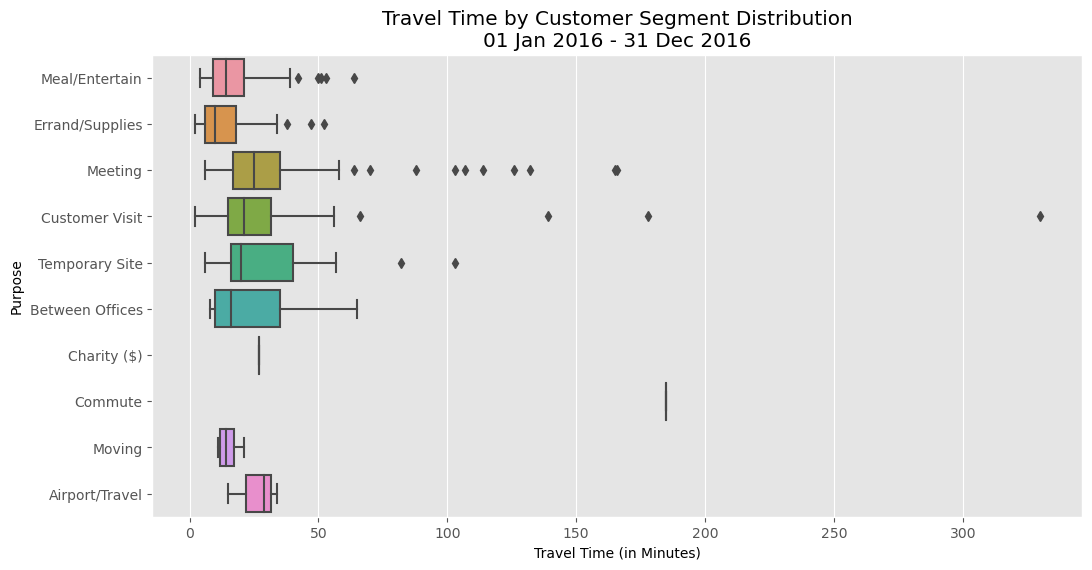

In [43]:
# Copying dataframe
travel_time = df.copy()

# Creating column duration
travel_time['DURATION'] = (travel_time['END_DATE'] - travel_time['START_DATE']).dt.total_seconds()/60

# Plotting
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(
    x = travel_time['DURATION'], 
    y = travel_time['PURPOSE'],
    ax = ax
)

# Customizing
ax.set_title('Travel Time by Customer Segment Distribution\n01 Jan 2016 - 31 Dec 2016')
ax.set_xlabel('Travel Time (in Minutes)')
ax.set_ylabel('Purpose')

plt.show()

### Insights
- We can see that our trip duration data also consists of many outliers.
- On the median, customers who have Errand/Supplies purpose tend to have relatively low travel duration.
- Customers with Meal/Entertain purposes have relatively low travel duration compared to other purposes in the Business category.
- On a median, customers who have Meetings, Customer Visits, Temporary Sites, and Between Offices purposes have similar travel duration.
- Customers who have Customer Visit purposes have relatively higher variability than the other purposes.

## Closing statement.

Thanks for taking the time to read this notebook. Your support and engagement mean a lot to me. Mistakes are part of the learning process, and I appreciate any feedback or insights you have to offer.

As I continue on my data science journey, I'll carry your encouragement with me. Together, we'll explore new horizons and unlock the mysteries of our data-driven world.

It's been a pleasure sharing this adventure with you. Looking forward to crossing paths again soon!